# Exports of waste from the U.S.

The following notebook includes data downloaded from UN Comtrade, "a repository of official international trade statistics and relevant analytical tables." Data downloaded includes U.S. paper scrap and plastic scrap export records per month from 2015 to 2021. The period of time was chosen based on data available through another trade data portal, Panjiva, and to account for significant market shifts that occurred in both 2018 and 2021. Data from 2015 is missing all values in the Netweight (kg) column. Paper scrap is classified under the HS Code 4707, and plastic scrap is classified under the HS Code 3915.

Analysis was performed to determine changes in the paper scrap market over the period defined above, including identifying major destinations, as well as how the changes in paper scrap exports compare to that of plastic waste exports. 

Data can be accessed here: https://comtrade.un.org/

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import matplotlib
%matplotlib inline
from datetime import datetime
import numpy as np
import re
import altair as alt
from vega_datasets import data

/Users/sheridanwall/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Paper scrap (HS 4707)

In [25]:
paper2021 = pd.read_csv('US-4707-2021.csv')
paper2020= pd.read_csv('US-4707-2020.csv')
paper2019 = pd.read_csv('US-4707-2019.csv')
paper2018 = pd.read_csv('US-4707-2018.csv')
paper2017 = pd.read_csv('US-4707-2017.csv')
paper2016 = pd.read_csv('US-4707-2016.csv')
paper2015 = pd.read_csv('US-4707-2015.csv')

In [20]:
# paper2021.shape
# paper2020.shape
# paper2019.shape
# paper2018.shape
# paper2017.shape
# paper2016.shape
# paper2015.shape

In [21]:
paper = pd.concat([paper2021, paper2020, paper2019, paper2018, paper2017, paper2016, paper2015])

In [24]:
paper.shape

(3934, 35)

In [22]:
paper.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2021,202107,July 2021,4,0,2,Exports,842,United States of America,NaN,218,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,2819000.0,NaN,653637,NaN,NaN,0
1,HS,2021,202107,July 2021,4,0,2,Exports,842,United States of America,NaN,528,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,10938000.0,NaN,2671670,NaN,NaN,0
2,HS,2021,202107,July 2021,4,0,2,Exports,842,United States of America,NaN,152,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,5088000.0,NaN,1270070,NaN,NaN,0
3,HS,2021,202107,July 2021,4,0,2,Exports,842,United States of America,NaN,422,Lebanon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,134000.0,NaN,20000,NaN,NaN,0
4,HS,2021,202107,July 2021,4,0,2,Exports,842,United States of America,NaN,858,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,389000.0,NaN,139900,NaN,NaN,0


In [26]:
paper['Weight'] = paper['Netweight (kg)']
paper['Value'] = paper['Trade Value (US$)']

In [27]:
paper['date'] =  pd.to_datetime(paper['Period'], format='%Y%m')

# U.S. paper scrap exports 2015-2021

<AxesSubplot:xlabel='Year'>

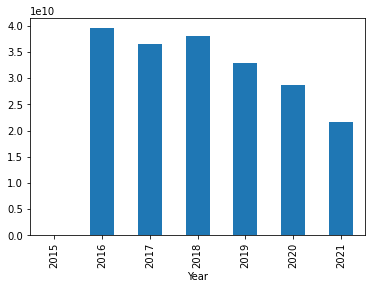

In [31]:
paper.groupby('Year').Weight.sum().plot(kind='bar')

In [37]:
paper['Year'] = paper['Year'].astype(str)

In [39]:
alt.Chart(paper).mark_bar().encode(
    x='Weight',
    y= 'Year'
).properties(
    title='U.S. Paper Scrap Exports')

alt.Chart(...)

In [43]:
paper_1 = paper.dropna(subset=['Weight'])

In [125]:
month_avg_paper = paper_1.groupby(pd.PeriodIndex(paper_1['date'], freq="M"))['Weight'].mean().reset_index()

In [135]:
month_avg_paper['date'] = month_avg_paper['date'].astype(str)

In [127]:
alt.Chart(month_avg_paper).mark_line().encode(
    x='date',
    y='Weight'
).properties(
    title='U.S. paper scrap exports per month')

alt.Chart(...)

In [128]:
yr_avg_paper = paper_1.groupby(pd.PeriodIndex(paper_1['date'], freq="Y"))['Weight'].mean().reset_index()

In [129]:
yr_avg_paper['date'] = yr_avg['date'].astype(str)

In [130]:
alt.Chart(yr_avg_paper).mark_line().encode(
    x='date',
    y='Weight'
).properties(
    title='U.S. paper scrap exports per year')

alt.Chart(...)

# U.S. paper scrap trading partners

Additional analysis performed in Excel to determine the percent change in paper scrap exports from the U.S. to importing countries since the China Ban.

In [54]:
paper_2 = paper[paper.Partner!= 'World']

In [55]:
yr_partner = paper_2.groupby(['Year','Partner']).agg({'Weight':'mean'}).reset_index()

In [56]:
yr_partner_1 = yr_partner.dropna(subset=['Weight'])

In [57]:
yr_partner_1.head()

,Year,Partner,Weight
64,2016,Argentina,1.361750e+06
65,2016,Australia,1.378333e+05
66,2016,Austria,6.033333e+04
67,2016,Bangladesh,1.880000e+05
68,2016,Belgium,8.155000e+05


In [58]:
yr_partner_transposed = yr_partner_1.pivot_table(values='Weight',index='Partner',columns='Year')

In [ ]:
yr_partner_trans.to_csv('US-4707-by-country-year.csv')

In [62]:
yr_partner_1['Weight'] = yr_partner_1['Weight'].astype('int64')

<ipython-input-62-68dba633b45a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_partner_1['Weight'] = yr_partner_1['Weight'].astype('int64')


In [65]:
yr_partner_1.sort_values(by='Weight', ascending=False).head(20)

,Year,Partner,Weight
77,2016,China,1099146000
154,2017,China,906043333
237,2018,China,630096750
328,2019,China,439466333
410,2020,China,365388666
510,2021,India,342055875
258,2018,India,278167916
347,2019,India,247764750
428,2020,India,179951166
521,2021,Mexico,174856250


In [67]:
alt.Chart(yr_partner_1).mark_bar().encode(
    x='Year:O',
    y='Weight:Q',
    color='Year:N',
    column='Partner:N'
)

alt.Chart(...)

In [70]:
paper2021['Weight'] = paper2021['Netweight (kg)']

In [74]:
paper2021_clean = paper2021[paper2021.Partner != 'World']

In [78]:
paper2021_weight = paper2021_clean.groupby('Partner').Weight.sum().reset_index()

In [79]:
paper2021_weight

,Partner,Weight
0,Algeria,19000
1,Argentina,17385000
2,Australia,384000
3,Austria,266000
4,Bahamas,36000
...,...,...
75,United Arab Emirates,49101000
76,United Kingdom,43208000
77,Uruguay,437000
78,Venezuela,234000


In [80]:
alt.Chart(paper2021_weight).mark_bar().encode(
    x='Partner',
    y='Weight',
    color='Partner'
)

alt.Chart(...)

# Percent of paper scrap exports to Brazil

Though the increase of exports to Brazil in 2021 has been significant, they still represented less than 2% of the total exports of paper scrap from the U.S. for the same year.

In [81]:
total = paper2021_clean.Weight.sum()

In [82]:
total

10856760000

In [86]:
paper2021_weight[paper2021_weight.Partner == 'Brazil']

,Partner,Weight
11,Brazil,170471000


# Plastic Scrap (HS 3915)

In [105]:
plastic2021 = pd.read_csv('US-3915-2021.csv')
plastic2020 = pd.read_csv('US-3915-2020.csv')
plastic2019 = pd.read_csv('US-3915-2019.csv')
plastic2018 = pd.read_csv('US-3915-2018.csv')
plastic2017 = pd.read_csv('US-3915-2017.csv')
plastic2016 = pd.read_csv('US-3915-2016.csv')
plastic2015 = pd.read_csv('US-3915-2015.csv')

In [104]:
# plastic2021.shape
# plastic2020.shape
# plastic2019.shape
# plastic2018.shape
# plastic2017.shape
# plastic2016.shape
# plastic2015.shape

In [106]:
plastic = pd.concat([plastic2021, plastic2020, plastic2019, plastic2018, plastic2017, plastic2016, plastic2015])

In [107]:
plastic.shape

(4316, 35)

In [108]:
plastic.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2021,202104,April 2021,4,0,2,Exports,842,United States of America,NaN,764,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3915,"Waste, parings and scrap, of plastics",NaN,NaN,NaN,NaN,NaN,NaN,950880.0,NaN,313382,NaN,NaN,0
1,HS,2021,202108,August 2021,4,0,2,Exports,842,United States of America,NaN,0,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3915,"Waste, parings and scrap, of plastics",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30346167,NaN,NaN,0
2,HS,2021,202108,August 2021,4,0,2,Exports,842,United States of America,NaN,32,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3915,"Waste, parings and scrap, of plastics",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000,NaN,NaN,0
3,HS,2021,202108,August 2021,4,0,2,Exports,842,United States of America,NaN,757,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3915,"Waste, parings and scrap, of plastics",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23400,NaN,NaN,0
4,HS,2021,202104,April 2021,4,0,2,Exports,842,United States of America,NaN,784,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3915,"Waste, parings and scrap, of plastics",NaN,NaN,NaN,NaN,NaN,NaN,243555.0,NaN,128141,NaN,NaN,0


In [116]:
plastic['Weight'] = plastic['Netweight (kg)']
plastic['Value'] = plastic['Trade Value (US$)']

<AxesSubplot:ylabel='Year'>

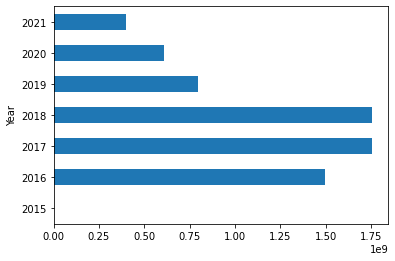

In [118]:
plastic.groupby('Year').Weight.sum().plot(kind='barh')

In [132]:
plastic['date'] =  pd.to_datetime(plastic['Period'], format='%Y%m')

In [133]:
month_avg_plastic = plastic.groupby(pd.PeriodIndex(plastic['date'], freq="M"))['Weight'].mean().reset_index()

In [134]:
month_avg_plastic['date'] = month_avg_plastic['date'].astype(str)

In [137]:
alt.Chart(month_avg_plastic).mark_line().encode(
    x='date',
    y='Weight'
).properties(
    title='U.S. plastic scrap exports per month')

alt.Chart(...)

In [139]:
month_avg_paper['HS_Code'] = '4707'

In [140]:
month_avg_plastic['HS_Code'] = '3915'

In [141]:
all_month_avg = pd.concat([month_avg_paper, month_avg_plastic])

In [142]:
alt.Chart(all_month_avg).mark_line().encode(
    x='date',
    y='Weight',
    color='HS_Code'
)

alt.Chart(...)

In [143]:
yr_avg_plastic = plastic.groupby(pd.PeriodIndex(plastic['date'], freq="Y"))['Weight'].mean().reset_index()

In [144]:
yr_avg_plastic['date'] = yr_avg_plastic['date'].astype(str)

In [145]:
alt.Chart(yr_avg_plastic).mark_line().encode(
    x='date',
    y='Weight'
).properties(
    title='U.S. plastic scrap exports per year')

alt.Chart(...)

In [148]:
yr_avg_paper['HS_Code'] = '4707'

In [149]:
yr_avg_plastic['HS_Code'] = '3915'

In [150]:
all_yr_avg = pd.concat([yr_avg_paper, yr_avg_plastic])

In [151]:
alt.Chart(all_yr_avg).mark_line().encode(
    x='date',
    y='Weight',
    color='HS_Code'
)

alt.Chart(...)